In [23]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

sns.set()
%matplotlib notebook

# Lectura de la data original y Limpieza

In [ ]:
def limpieza_datos(data):
    """Nombre Completo = Clave Columna = Causatalogo

    Causa Defunción (Lista Detallada) = causa_def = decatcausa *
    Nacionalidad = nacionalid = denacion = 1

    Sexo = sexo = 1-Hombre, 2-Mujer, 3-no especificado
    Año Defunción = anio_ocur = deaño *
    """
    # se filtran las columnas de interes
    data = data[['causa_def','nacionalid','sexo','anio_ocur']]
    # Buscamos unicamente aquellos que sean de nacionalidad Mexicana
    data= data[data['nacionalid'] == 1]
    # Filtramos por los diferentes tipos de diagnostico
    data = data[
    (data['causa_def'] == 'F204') |
    (data['causa_def'] == 'F251') |
    (data['causa_def'] == 'F313') |
    (data['causa_def'] == 'F314') |
    (data['causa_def'] == 'F315') |
    (data['causa_def'] == 'F320') |
    (data['causa_def'] == 'F321') |
    (data['causa_def'] == 'F322') |
    (data['causa_def'] == 'F323') |
    (data['causa_def'] == 'F328') |
    (data['causa_def'] == 'F329') |
    (data['causa_def'] == 'F330') |
    (data['causa_def'] == 'F331') |
    (data['causa_def'] == 'F332') |
    (data['causa_def'] == 'F333') |
    (data['causa_def'] == 'F334') |
    (data['causa_def'] == 'F338') |
    (data['causa_def'] == 'F339') |
    (data['causa_def'] == 'F412') |
    (data['causa_def'] == 'F920') ]
    
    return data

In [ ]:

data2012 = pd.read_csv('./DataINEGI/conjunto_de_datos/defunciones_generales_2012.csv')
data2012 = limpieza_datos(data2012)
data2012.to_csv('./DataLimpiaINEGI/data2012.csv')

data2013 = pd.read_csv('./DataINEGI/conjunto_de_datos/defunciones_generales_2013.csv')
data2013 = limpieza_datos(data2013)
data2013.to_csv('./DataLimpiaINEGI/data2013.csv')

data2014 = pd.read_csv('./DataINEGI/conjunto_de_datos/defunciones_generales_2014.csv')
data2014 = limpieza_datos(data2014)
data2014.to_csv('./DataLimpiaINEGI/data2014.csv')

data2015 = pd.read_csv('./DataINEGI/conjunto_de_datos/defunciones_generales_2015.csv')
data2015 = limpieza_datos(data2015)
data2015.to_csv('./DataLimpiaINEGI/data2015.csv')

data2016 = pd.read_csv('./DataINEGI/conjunto_de_datos/defunciones_generales_2016.csv')
data2016 = limpieza_datos(data2016)
data2016.to_csv('./DataLimpiaINEGI/data2016.csv')

data2017 = pd.read_csv('./DataINEGI/conjunto_de_datos/conjunto_de_datos_defunciones_generales_2017.CSV',low_memory=False)
data2017 = limpieza_datos(data2017)
data2017.to_csv('./DataLimpiaINEGI/data2017.csv')

data2018 = pd.read_csv('./DataINEGI/conjunto_de_datos/conjunto_de_datos_defunciones_registradas_2018.csv',low_memory=False)
data2018 = limpieza_datos(data2018)
data2018.to_csv('./DataLimpiaINEGI/data2018.csv')

data2019 = pd.read_csv('./DataINEGI/conjunto_de_datos/conjunto_de_datos_defunciones_registradas_2019.csv',low_memory=False)
data2019 = limpieza_datos(data2019)
data2019.to_csv('./DataLimpiaINEGI/data2019.csv')

# Lectura y Analisis de la Data de Interes

In [2]:
# Leemos los datos
carpeta = os.listdir('./DataLimpiaINEGI')

df = pd.read_csv('./DataLimpiaINEGI/data2012.csv')
df['archivo']='data2012'

for archivo in carpeta[1:]:
    data = pd.read_csv(f'./DataLimpiaINEGI/{archivo}')
    data['archivo']= archivo
    df = pd.concat([data,df])

In [3]:
df.set_index('Unnamed: 0',drop=True,inplace=True)

In [4]:
# Generamos un solo DF
df=df[df['anio_ocur']>=2012]
df

,causa_def,nacionalid,sexo,anio_ocur,archivo
Unnamed: 0,,,,,
2256,F329,1,1,2019,data2019.csv
4093,F329,1,2,2019,data2019.csv
4549,F329,1,1,2019,data2019.csv
4680,F329,1,1,2018,data2019.csv
5358,F329,1,2,2019,data2019.csv
...,...,...,...,...,...
587523,F329,1,2,2012,data2012
594776,F329,1,2,2012,data2012
595081,F329,1,2,2012,data2012


In [5]:
def_año_sexo = pd.DataFrame(df.groupby(['sexo','anio_ocur']).agg({'anio_ocur':'count'}))
def_año = df.groupby(['anio_ocur']).agg({'anio_ocur':'count'})

<IPython.core.display.Javascript object>


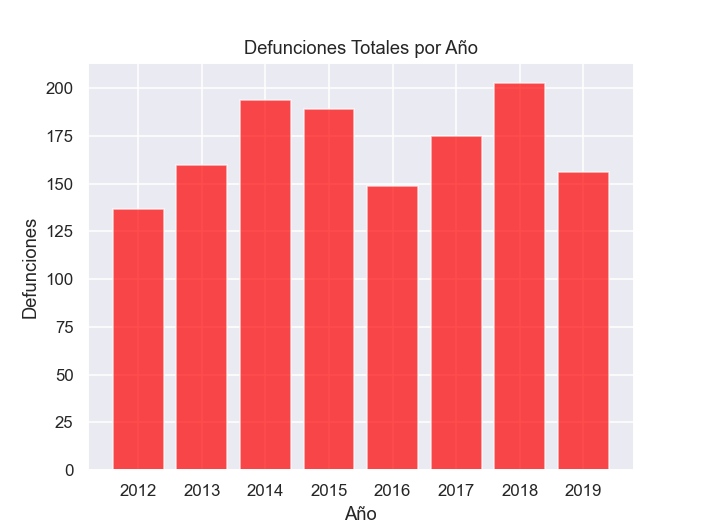

In [16]:
# Defunciones por depresion por año
y=def_año.values
y = [a for i in y for a in i]
x = [x for x in def_año.index]
plt.title('Defunciones Totales por Año')
plt.xlabel('Año')
plt.ylabel('Defunciones')
plt.bar(x=x,height=y,color='red',alpha=.7)
plt.savefig('./Imagenes/Graficas/Defunciones_Año.png');

<IPython.core.display.Javascript object>


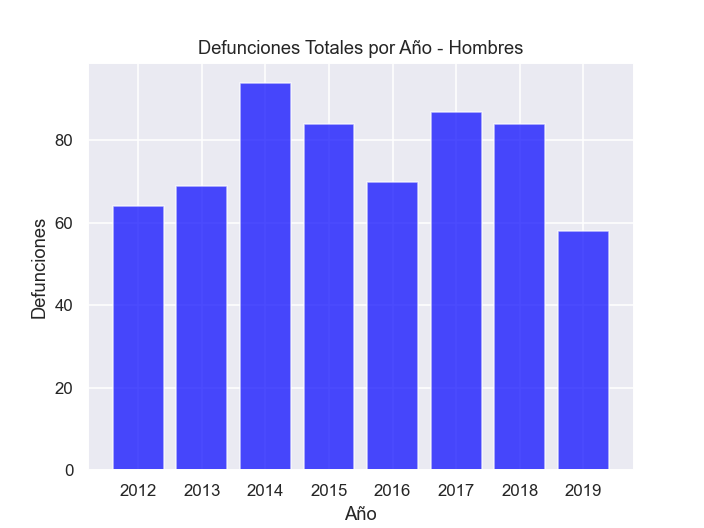

In [19]:
# Separamos la data de los Hombres
df_h = df[df['sexo']== 1]
df_h = df_h.groupby(['anio_ocur']).agg({'anio_ocur':'count'})

y=df_h.values
y = [a for i in y for a in i]
x = [x for x in df_h.index]
plt.title('Defunciones Totales por Año - Hombres')
plt.xlabel('Año')
plt.ylabel('Defunciones')
plt.bar(x=x,height=y,color='blue',alpha=.7)
plt.savefig('./Imagenes/Graficas/Defunciones_Año_H.png');

<IPython.core.display.Javascript object>


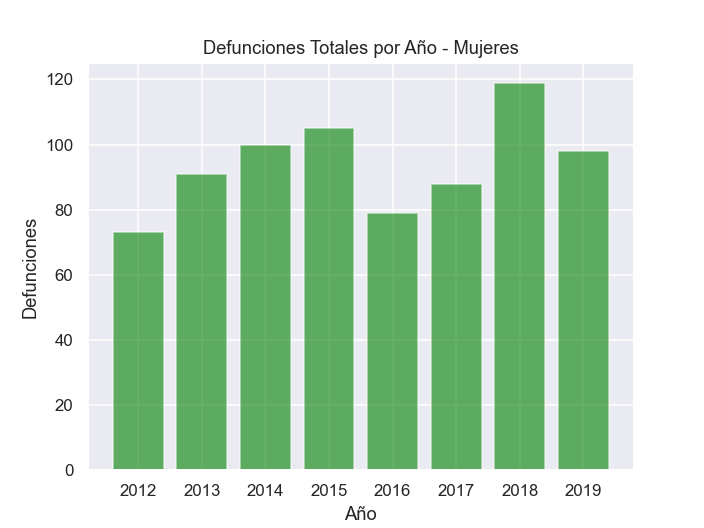

In [18]:
# Separamos la data de Mujeres
df_m = df[df['sexo']== 2]
df_m = df_m.groupby(['anio_ocur']).agg({'anio_ocur':'count'})

y=df_m.values
y = [a for i in y for a in i]
x = [x for x in df_m.index]
plt.title('Defunciones Totales por Año - Mujeres')
plt.xlabel('Año')
plt.ylabel('Defunciones')
plt.bar(x=x,height=y,color='green',alpha=.6)
plt.savefig('./Imagenes/Graficas/Defunciones_Año_M.png');

<IPython.core.display.Javascript object>


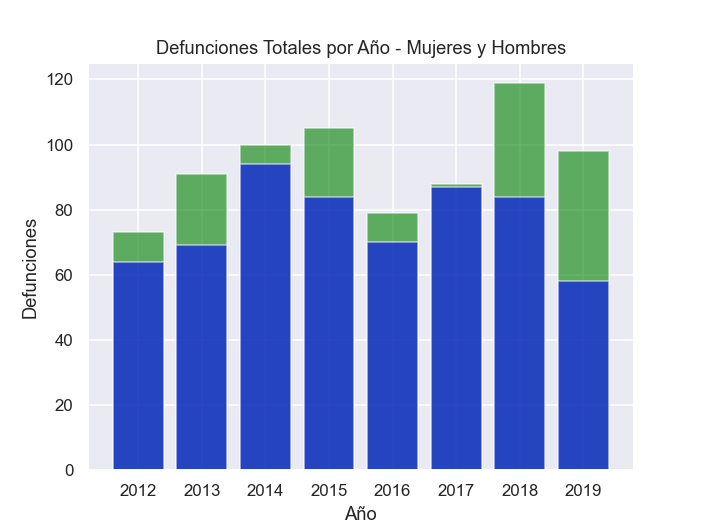

In [22]:
# Grafica identificando el genero
y_m=df_m.values
y_m = [a for i in y_m for a in i]
x_m = [x_m for x_m in df_m.index]
plt.title('Defunciones Totales por Año - Mujeres y Hombres')
plt.xlabel('Año')
plt.ylabel('Defunciones')
plt.bar(x=x_m,height=y_m,color='green',alpha=.6)
plt.bar(x=x,height=y,color='blue',alpha=.6)
plt.savefig('./Imagenes/Graficas/Defunciones_Año_MH.png');